In [49]:
import pandas as pd

# Load datasets
transactions_df = pd.read_csv('/content/Transactions.csv')
products_df = pd.read_csv('/content/Products.csv')
customers_df = pd.read_csv('/content/Customers.csv')

# Display basic info and first few rows
print(transactions_df.info())
print(transactions_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10 

In [50]:
print(products_df.info())
print(products_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [51]:
print(customers_df.info())
print(customers_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [52]:
# Convert date columns to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Check for duplicates
print(transactions_df.duplicated().sum())
print(products_df.duplicated().sum())
print(customers_df.duplicated().sum())


0
0
0


In [53]:
# Summary statistics of transactions
print(transactions_df.describe())

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


In [54]:
# Summary of product prices
print(products_df['Price'].describe())


count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [55]:
# Customer region distribution
print(customers_df['Region'].value_counts())

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [56]:
# Merge transactions with products and customers
df = transactions_df.merge(products_df, on='ProductID').merge(customers_df, on='CustomerID')

# View merged dataset
print(df.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region SignupDate  
0   Andrea Jenkins         Europe 2022-12-03 

In [57]:
# Top-selling products by quantity
top_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_products)

# Revenue generated by region
revenue_by_region = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(revenue_by_region)

# Top customers by total value spent
top_customers = df.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(top_customers)


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


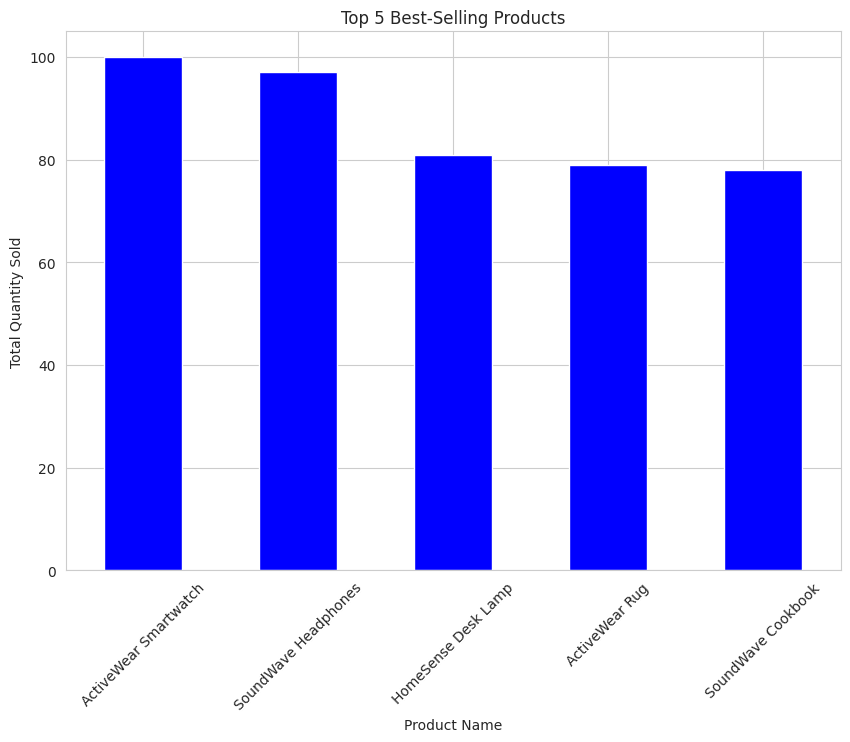

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# Bar Plot: Top 5 best-selling products
plt.figure(figsize=(10, 7))
top_products.plot(kind='bar', color='blue')
plt.title('Top 5 Best-Selling Products')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

<ipython-input-59-dbfc4ca7c082>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = df.resample('M', on='TransactionDate')['TotalValue'].sum()


TransactionDate
2023-12-31     3769.52
2024-01-31    66376.39
2024-02-29    51459.27
2024-03-31    47828.73
2024-04-30    57519.06
2024-05-31    64527.74
2024-06-30    48771.18
2024-07-31    71366.39
2024-08-31    63436.74
2024-09-30    70603.75
2024-10-31    47063.22
2024-11-30    38224.37
2024-12-31    59049.20
Freq: ME, Name: TotalValue, dtype: float64


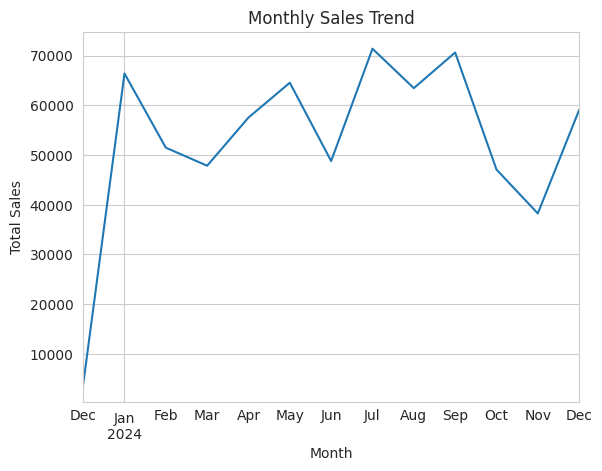

In [59]:
# Monthly sales trend
sales_trend = df.resample('M', on='TransactionDate')['TotalValue'].sum()
print(sales_trend)

# Plot the sales trend
import matplotlib.pyplot as plt

sales_trend.plot(title='Monthly Sales Trend', ylabel='Total Sales', xlabel='Month')
plt.show()


In [60]:
# Average purchase per customer
avg_purchase = df.groupby('CustomerID')['TotalValue'].mean()
print(avg_purchase.describe())

# Customer signup trends over time
signup_trend = customers_df['SignupDate'].dt.year.value_counts().sort_index()
print(signup_trend)


count     199.000000
mean      687.580182
std       237.936649
min        82.360000
25%       542.941667
50%       677.207500
75%       828.624167
max      1323.133333
Name: TotalValue, dtype: float64
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


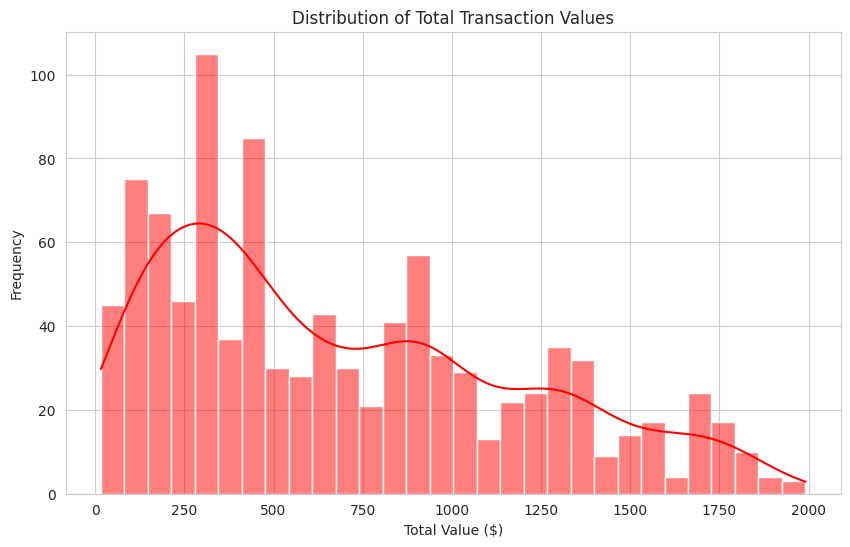

In [61]:
# Histogram: Distribution of total transaction values
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['TotalValue'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Transaction Values')
plt.xlabel('Total Value ($)')
plt.ylabel('Frequency')
plt.show()



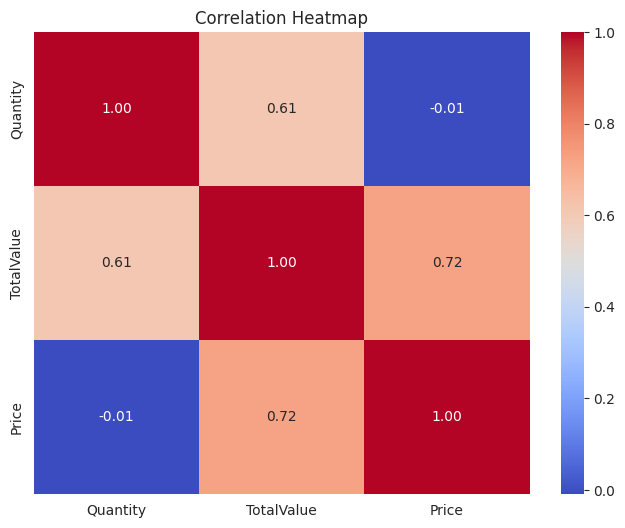

In [62]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transactions_df[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



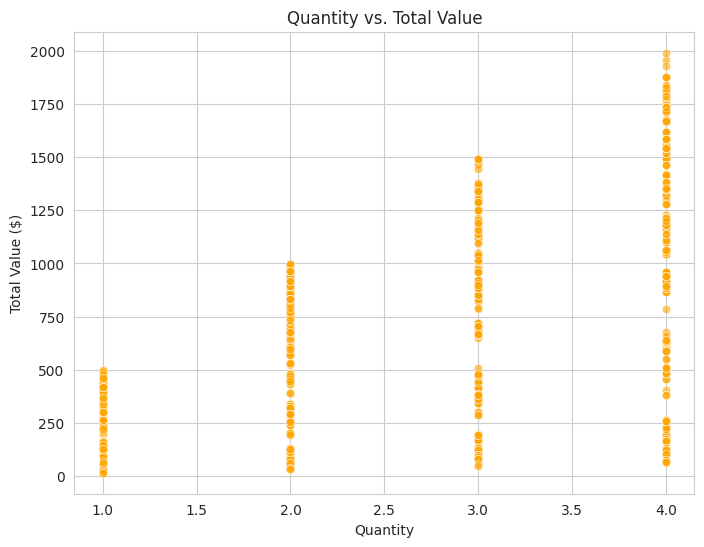

In [63]:
# Scatter Plot: Quantity vs. Total Value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions_df, x='Quantity', y='TotalValue', alpha=0.6, color='orange')
plt.title('Quantity vs. Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value ($)')
plt.show()
